Import thư viện

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import pickle
from sklearn.neighbors import KNeighborsClassifier

Tiền xử lý dữ liệu

In [152]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
data = pd.read_csv(url)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [153]:
data = data.replace("?", np.nan)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [154]:
#Xóa các dòng có phần lớn là null
limit = len(data.columns) * 0.75  # ít nhất 75%
data = data.dropna(thresh=limit)

In [155]:
#Xóa các cột có phần lớn là null
data = data.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"],axis=1)

In [156]:
data = data.apply(pd.to_numeric, errors='coerce')

In [157]:
#Coi thông tin dataset
pd.set_option('display.max_columns', None)

data.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,753.00000,739.000000,747.000000,706.000000,743.000000,743.000000,743.000000,740.000000,740.000000,737.000000,737.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,27.22842,2.529093,17.089692,2.317280,0.144011,1.227273,0.464308,0.637838,2.212019,0.112619,0.517598,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.099602,0.023904,0.010624,0.023904,0.030544,0.046481,0.096946,0.054449,0.070385
std,8.68086,1.684508,2.843786,1.470721,0.351337,4.140382,2.301630,0.480950,3.634537,0.316341,1.947990,0.306646,0.561993,0.234716,0.0,0.072739,0.232197,0.152853,0.036442,0.036442,0.036442,0.0,0.152853,0.036442,0.051503,0.321089,0.152853,0.102593,0.152853,0.172194,0.210664,0.296080,0.227052,0.255965
min,13.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.00000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.00000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.00000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.00000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
#Bỏ các cột ko tác dụng đến target
data = data.drop(["STDs:cervical condylomatosis", "STDs:AIDS"],axis=1)
#Check null
data.isnull().sum()


,0
Age,0
Number of sexual partners,14
First sexual intercourse,6
Num of pregnancies,47
Smokes,10
Smokes (years),10
Smokes (packs/year),10
Hormonal Contraceptives,13
Hormonal Contraceptives (years),13
IUD,16


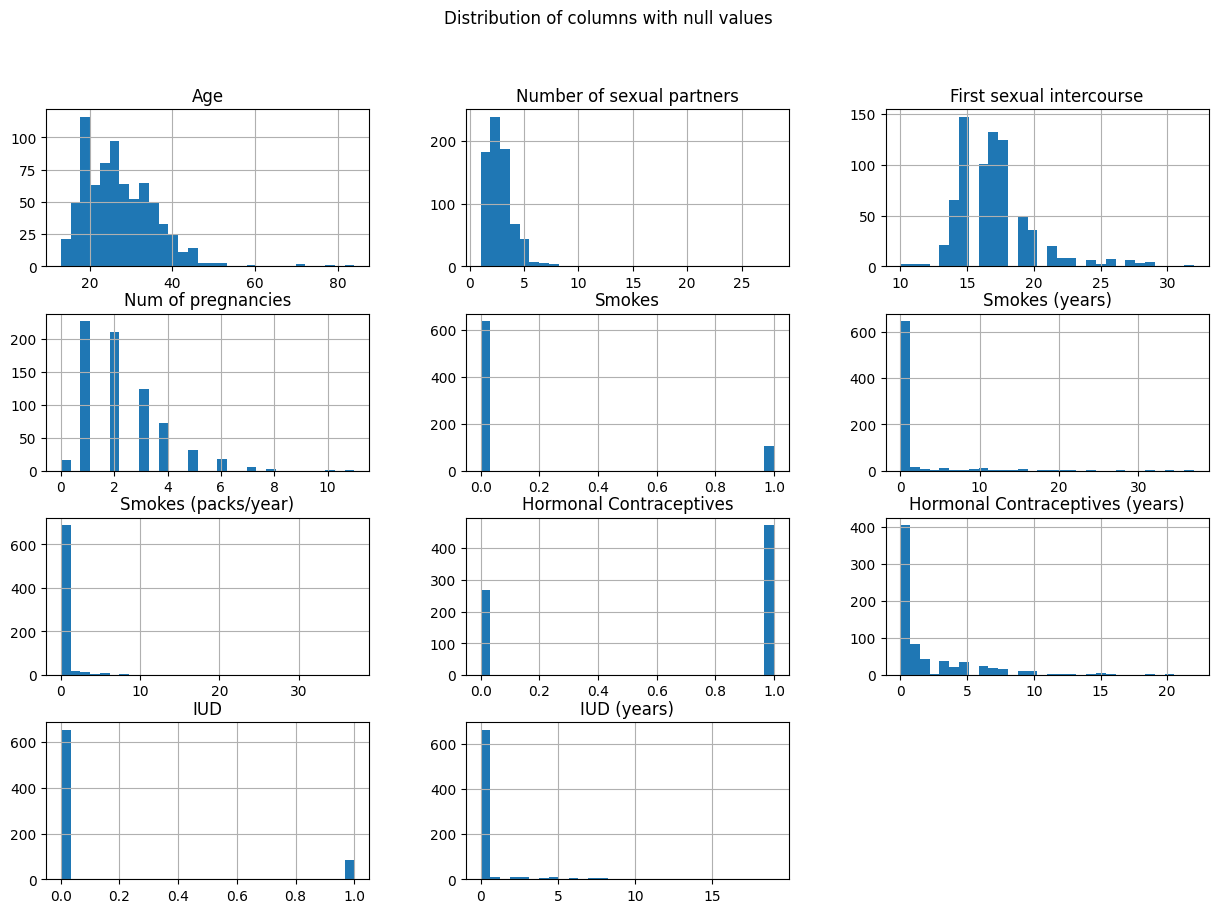

In [159]:
#Nghiên cứu phân bố của các cột
columns_na = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
              'Hormonal Contraceptives', 'Hormonal Contraceptives (years)','IUD', 'IUD (years)'
]

#Biểu đồ tần suất
data[columns_na].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of columns with null values')
plt.show()

In [160]:

# Điền giá trị
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Smokes'] = data['Smokes'].fillna(0)
data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(1)
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['IUD'] = data['IUD'].fillna(0)
data['IUD (years)'] = data['IUD (years)'].median()

In [161]:
data.to_csv('test.csv', index=False)

In [162]:
#Chuyển boolean yes/no thành 0 1
data = pd.get_dummies(data=data, columns=['Smokes','Hormonal Contraceptives','IUD','STDs', 'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [163]:
# Hết null
data.isnull().sum().shape

(43,)

In [164]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width',1000)
print(data)

     Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives (years)  IUD (years)  STDs (number)  STDs:condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  Biopsy  Smokes_0.0  Smokes_1.0  Hormonal Contraceptives_0.0  Hormonal Contraceptives_1.0  IUD_0.0  IUD_1.0  STDs_0.0  STDs_1.0  Dx:Cancer_0  Dx:Cancer_1  Dx:CIN_0  Dx:CIN_1  Dx:HPV_0  Dx:HPV_1  Dx_0   Dx_1  Hinselmann_0  Hinselmann_1  Citology_0  Citology_1  Schiller_0  Schiller_1
0     18                        4.0                      15.0                 1.0             0.0                  0.0                             0.00          0.0            0.0                  0.0                          0.0                                 0.0            0.0        

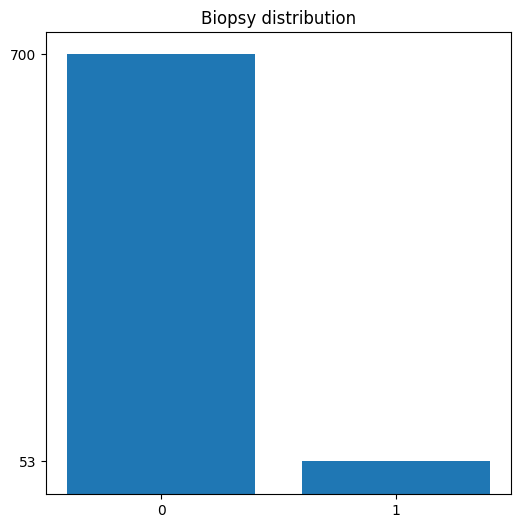

In [165]:
#Nhãn
biopsy_distribution = data["Biopsy"].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(biopsy_distribution.index, biopsy_distribution.values)
plt.xticks(biopsy_distribution.index)
plt.yticks(biopsy_distribution.values)
plt.title("Biopsy distribution")
plt.show()

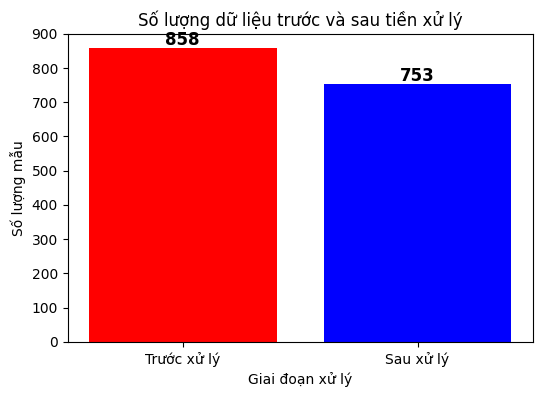

In [166]:
labels = ['Trước xử lý', 'Sau xử lý']
values = [858, 753]

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['red', 'blue'])

# Thêm nhãn
plt.xlabel("Giai đoạn xử lý")
plt.ylabel("Số lượng mẫu")
plt.title("Số lượng dữ liệu trước và sau tiền xử lý")
plt.ylim(0, 900)

# Hiển thị giá trị trên thanh
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12, fontweight='bold')

# Hiển thị biểu đồ
plt.show()

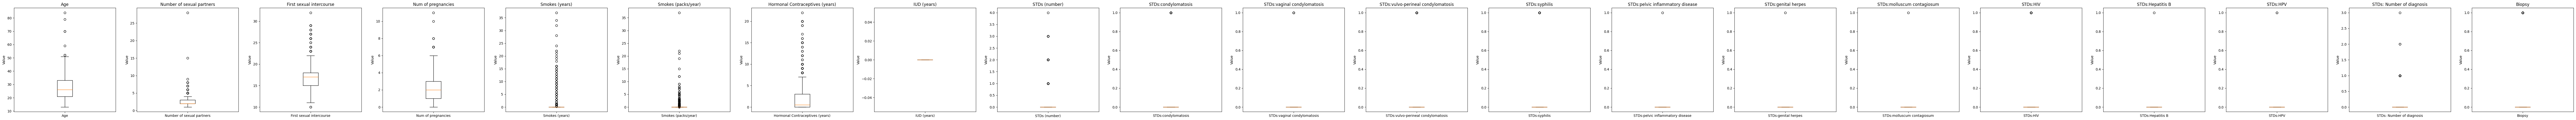

In [167]:
# Lọc chỉ lấy các cột kiểu số
numeric_data = data.select_dtypes(include='number')

num_columns = len(numeric_data.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

#Tạo boxplot cho mỗi cột dạng số
for ax, column in zip(axes, numeric_data.columns):
    ax.boxplot(numeric_data[column])
    ax.set_title(column)
    ax.set_ylabel('Value')
    ax.set_xticklabels([column])

plt.tight_layout()
plt.show()

Huấn luyện mô hình

In [168]:
Y=data["Biopsy"]
X=data.drop(columns=["Biopsy"])
#X = data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])

In [169]:
# Chuẩn hóa dữ liệu
import joblib
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')  # Lưu scaler

['scaler.pkl']

In [170]:
train_columns = X.columns
with open('scaler_columns.pkl', 'wb') as f:
    pickle.dump(train_columns, f)

In [171]:
# Chia DL thành tập huấn luyện và tập test (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Random Forest

In [172]:
# Khởi tạo RandomForest model

# model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, Y_train)
# print("Siêu tham số tốt nhất:", grid_search.best_params_)
# best_rf_model = grid_search.best_estimator_


#Tham số tốt nhất: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
model_rf_final = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
# Huấn luyện model
model_rf_final.fit(X_train, Y_train)

import pickle

filename = 'rf.pkl'
pickle.dump(model_rf_final, open(filename, 'wb'))
# Dự đoán
Y_pred = model_rf_final.predict(X_test)


    Importance                          Feature
41    0.288239                       Schiller_1
40    0.168386                       Schiller_0
36    0.092956                     Hinselmann_0
37    0.072612                     Hinselmann_1
0     0.065635                              Age
2     0.047335         First sexual intercourse
6     0.039629  Hormonal Contraceptives (years)
1     0.032488        Number of sexual partners
39    0.031301                       Citology_1
3     0.026623               Num of pregnancies


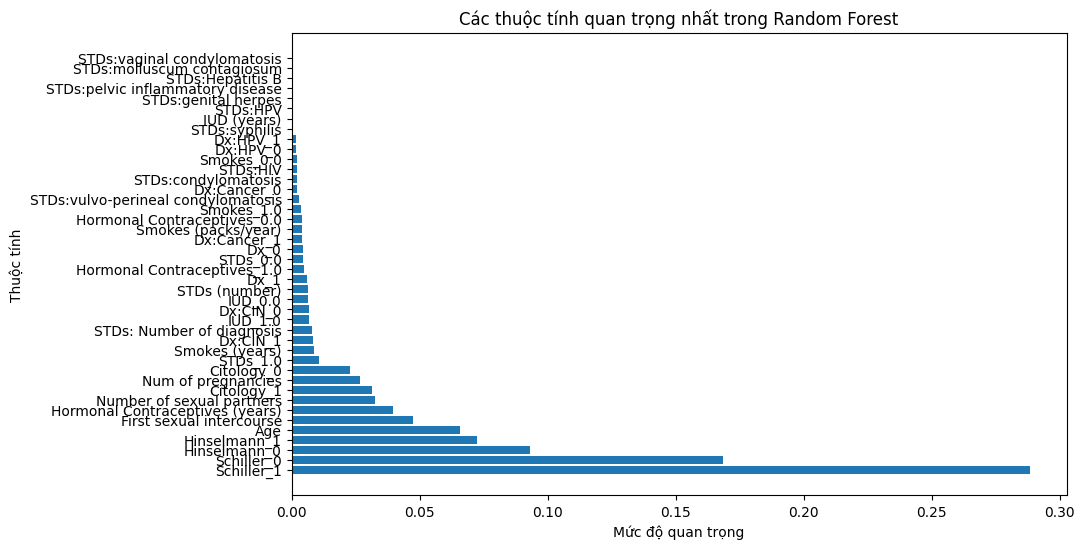

In [173]:
#Tìm thuộc tính quan trọng nhất
feature_importances = model_rf_final.feature_importances_
feature_importances = pd.DataFrame(feature_importances, columns=['Importance'])
X_train_df = pd.DataFrame(X_train, columns=X.columns)
feature_importances['Feature'] = X_train_df.columns
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances.head(10))
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Thuộc tính")
plt.title("Các thuộc tính quan trọng nhất trong Random Forest")
plt.show()

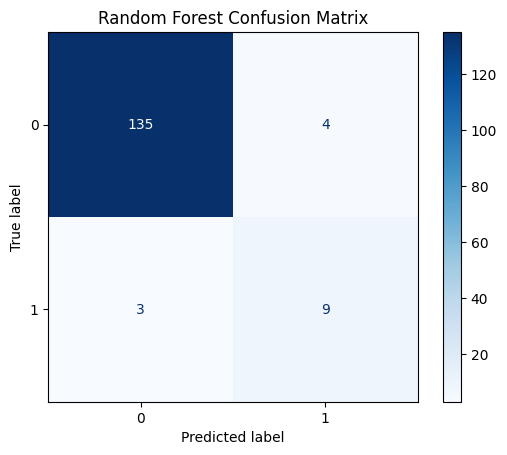

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       139
           1       0.69      0.75      0.72        12

    accuracy                           0.95       151
   macro avg       0.84      0.86      0.85       151
weighted avg       0.96      0.95      0.95       151

Accuracy: 0.9536423841059603


In [174]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred)

# Hiển thị
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()
# Đánh giá model
print(classification_report(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

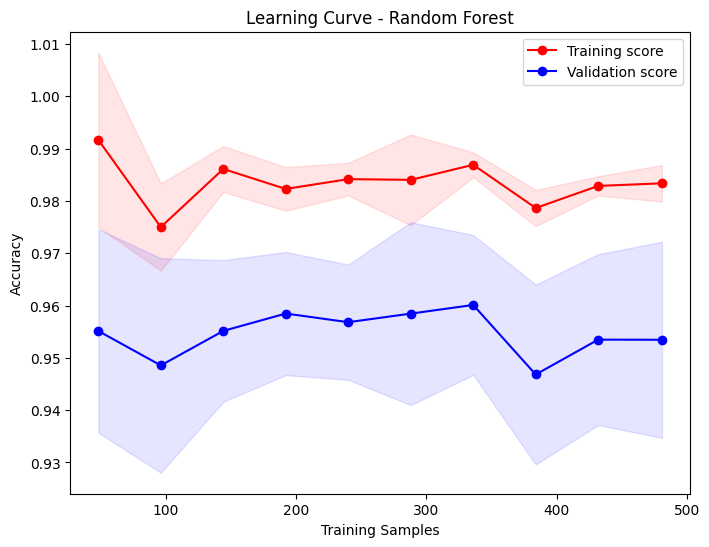

In [175]:
# Tính toán learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model_rf_final, X_train, Y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)
# Tính trung bình và độ lệch chuẩn của train/test score
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Vẽ biểu đồ Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="b", label="Validation score")

# Vẽ khoảng sai số
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="b", alpha=0.1)

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()

KNN

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       139
           1       1.00      0.42      0.59        12

    accuracy                           0.95       151
   macro avg       0.98      0.71      0.78       151
weighted avg       0.96      0.95      0.94       151

Accuracy: 0.9536423841059603


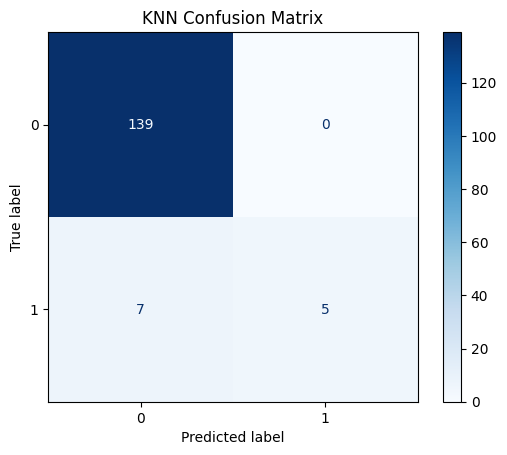

In [176]:
# param_grid = {'n_neighbors': range(1, 31)}  # Thử nghiệm từ K=1 đến 30
# model_knn = KNeighborsClassifier()
# grid_search = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, Y_train)

# print(f"K tối ưu: {grid_search.best_params_['n_neighbors']}")
#Best K=13
model_knn = KNeighborsClassifier(n_neighbors=13)
model_knn.fit(X_train, Y_train)
#Use X_train instead of X_scaled for fitting
Y_pred_knn = model_knn.predict(X_test)
print(classification_report(Y_test, Y_pred_knn))
accuracy = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy:", accuracy)

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred_knn)

# Hiển thị
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show()

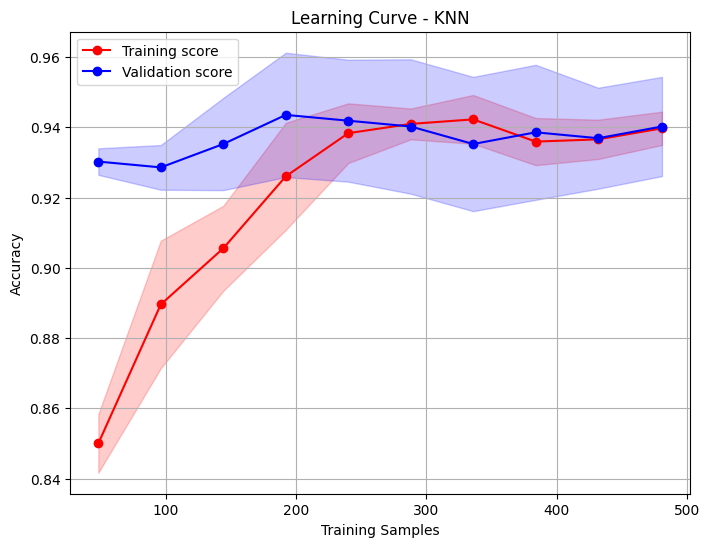

In [177]:
train_sizes, train_scores, val_scores = learning_curve(
    model_knn, X_train, Y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Tính giá trị trung bình và độ lệch chuẩn của accuracy
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Vẽ biểu đồ Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color='b', label="Validation score")

# Vẽ khoảng sai số (shaded region)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='b')

# Định dạng biểu đồ
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - KNN")
plt.legend(loc="best")
plt.grid()
plt.show()

artificial neural network

In [178]:
# Define the neural network model
def create_model():
    model = Sequential()
    # Input layer and first hidden layer with Batch Normalization and L2 regularization
    model.add(Input(shape=(42,)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer with Batch Normalization and L2 regularization
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third hidden layer with Batch Normalization and L2 regularization
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Fourth hidden layer with Batch Normalization and L2 regularization
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # New additional fifth hidden layer to increase model complexity
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [179]:
# Fit the model to the training data
model=create_model()
training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6165 - loss: 2.9567 - val_accuracy: 0.8808 - val_loss: 2.7522
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6725 - loss: 2.7851 - val_accuracy: 0.9338 - val_loss: 2.5773
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6411 - loss: 2.6922 - val_accuracy: 0.9603 - val_loss: 2.4334
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7198 - loss: 2.5719 - val_accuracy: 0.9470 - val_loss: 2.3075
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7484 - loss: 2.4389 - val_accuracy: 0.9669 - val_loss: 2.1983
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7929 - loss: 2.3225 - val_accuracy: 0.9603 - val_loss: 2.0990
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8402 - loss: 2.2216 - val_accuracy: 0.9669 - val_loss: 2.0010
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 2.1358 - val_accuracy: 0.9735

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


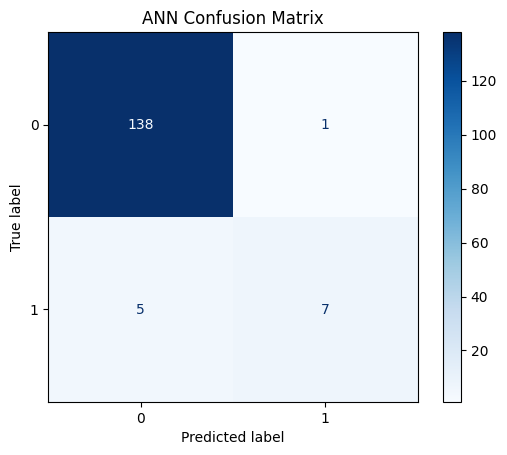

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.88      0.58      0.70        12

    accuracy                           0.96       151
   macro avg       0.92      0.79      0.84       151
weighted avg       0.96      0.96      0.96       151

Accuracy: 0.9602649006622517


In [180]:
# Make predictions
Y_pred_prob = model.predict(X_test)
Y_pred_ann = (Y_pred_prob > 0.5).astype("int32").flatten()  # Convert probabilities to binary predictions (0 or 1)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_ann)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('ANN Confusion Matrix')
plt.show()
print(classification_report(Y_test, Y_pred_ann))
accuracy = accuracy_score(Y_test, Y_pred_ann)
print("Accuracy:", accuracy)

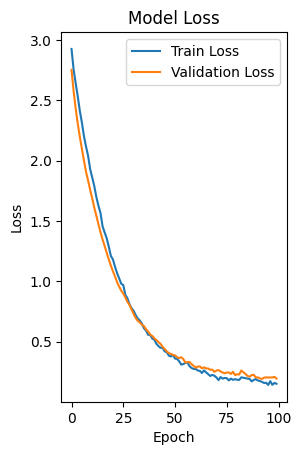

In [181]:
plt.subplot(1, 2, 2)
plt.plot(training.history['loss'], label='Train Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

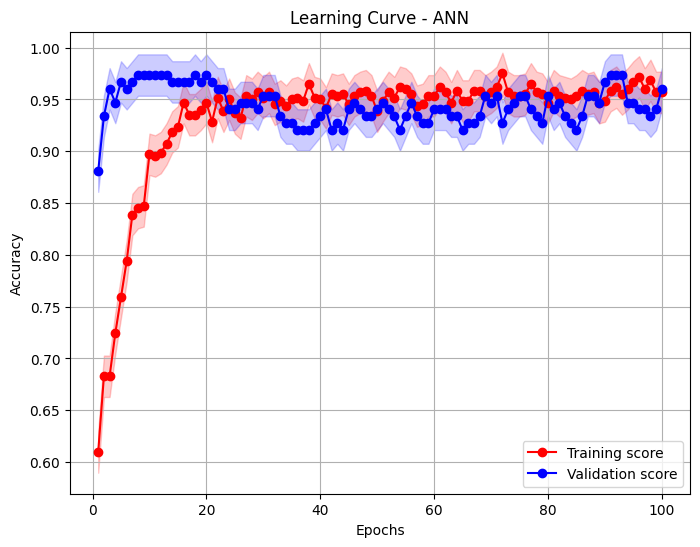

In [182]:
# Trích xuất dữ liệu từ lịch sử huấn luyện
train_acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Vẽ Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'o-', color='r', label="Training score")
plt.plot(epochs, val_acc, 'o-', color='b', label="Validation score")

# Vẽ khoảng sai số (shaded region)
plt.fill_between(epochs, np.array(train_acc) - 0.02, np.array(train_acc) + 0.02, alpha=0.2, color='r')
plt.fill_between(epochs, np.array(val_acc) - 0.02, np.array(val_acc) + 0.02, alpha=0.2, color='b')

# Định dạng biểu đồ
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve - ANN")
plt.legend(loc="best")
plt.grid()
plt.show()

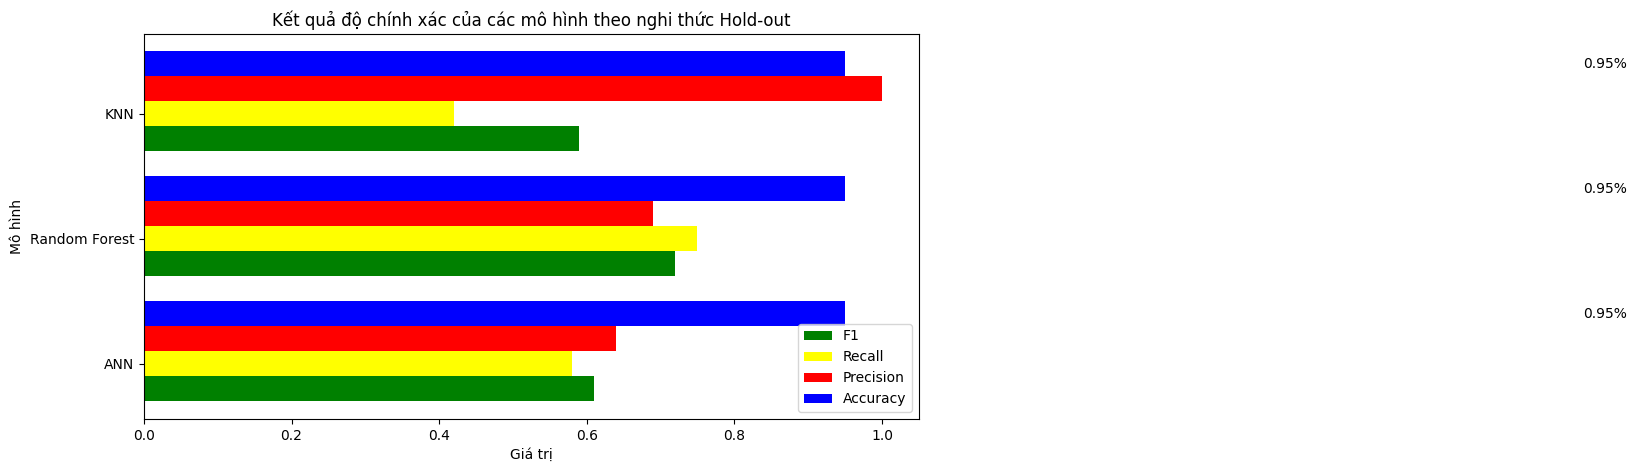

In [183]:
# Dữ liệu mô hình
models = ["ANN", "Random Forest", "KNN"]
accuracy = [0.95, 0.95, 0.95]
precision = [0.64, 0.69, 1.00]
recall = [0.58, 0.75, 0.42]
f1_score = [0.61, 0.72, 0.59]

# Thiết lập vị trí thanh ngang
y = np.arange(len(models))
height = 0.2

# Tạo biểu đồ thanh ngang
plt.figure(figsize=(10, 5))
plt.barh(y - height, f1_score, height, color='green', label="F1")
plt.barh(y, recall, height, color='yellow', label="Recall")
plt.barh(y + height, precision, height, color='red', label="Precision")
plt.barh(y + 2*height, accuracy, height, color='blue', label="Accuracy")

# Nhãn và tiêu đề
plt.xlabel("Giá trị")
plt.ylabel("Mô hình")
plt.title("Kết quả độ chính xác của các mô hình theo nghi thức Hold-out")
plt.yticks(y, models)
plt.legend()

# Hiển thị giá trị trên thanh
for i in range(len(models)):
    plt.text(accuracy[i] + 1, i + 2*height, f"{accuracy[i]}%", va='center')

# Hiển thị biểu đồ
plt.show()